Unit 1, Sprint 3, Module 3

###Learning Objectives:
- Student can model the relationship of multple predictor variables to a single outcome.
- Student can conduct a t-test to determine the significance of individual variables in the model.
- Student can compare model fit using R-squared

#Use the following information to answer the assignment questions.

###Is head size related to brain weight in healthy adult humans?

The Brainhead.csv dataset provides information on 237 individuals who were subject to post-mortem examination at the Middlesex Hospital in London around the turn of the 20th century. Study authors used cadavers to see if a relationship between brain weight and other more easily measured physiological characterizes such as age, sex, and head size could be determined. The end goal was to develop a way to estimate a person’s brain size while they were still alive (as the living aren’t keen on having their brains taken out and weighed). 

**We wish to determine if we can improve on our model of the linear relationship between head size and brain weight in healthy human adults.**

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123.

In [1]:
#Import the Brainhead.csv dataset from a URL and print the first few rows

import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Brainhead/Brainhead.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

df.head()

,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


From the data dictionary:

Gender: 1 = male, 2 = female

Age: 1 = younger than age 46, 2 = age 46 and older

1) Run the OLS model relating head size to brain weight (you should have done this in your project yesterday) and print your results

In [2]:
### YOUR CODE HERE ###
from statsmodels.formula.api import ols

model = ols('Brain ~ Head', data=df).fit()
print(model.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           5.96e-54
Time:                        19:26:33   Log-Likelihood:                -1350.3
No. Observations:                 237   AIC:                             2705.
Df Residuals:                     235   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    325.5734     47.141      6.906      0.0

2) What is the adjusted $R^2$ for this model?  Explain what this value means in a complete sentence.



Our adjusted $R^{2}$ value is 0.638. This calculation takes into account the residuals of our data and the number of independent variables and tells us that about 64% of the variance of brain weight is explained by head size.


3) Right now age and gender are coded with 1 and 2.  Just to be safe when we run our model, we want to subtract "1" from Age and Gender so that "1" is now coded as "0" and "2" is now coded as "1".  Create two new variables in the dataframe to do this - don't overwrite the original variables.

In [9]:
### YOUR CODE HERE ###
df['new_age'] = df['Age'] - 1
df['new_gen'] = df['Gender'] - 1
df

,Gender,Age,Head,Brain,new_age,new_gen
0,1,1,4512,1530,0,0
1,1,1,3738,1297,0,0
2,1,1,4261,1335,0,0
3,1,1,3777,1282,0,0
4,1,1,4177,1590,0,0
...,...,...,...,...,...,...
232,2,2,3214,1110,1,1
233,2,2,3394,1215,1,1
234,2,2,3233,1104,1,1
235,2,2,3352,1170,1,1


4) Model the relationship of age group and head size to brain weight.

In [11]:
### YOUR CODE HERE ###
model_age = ols('Brain ~ Head + new_age', data=df).fit()
print(model_age.summary())

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     214.1
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           1.38e-53
Time:                        19:27:50   Log-Likelihood:                -1347.8
No. Observations:                 237   AIC:                             2702.
Df Residuals:                     234   BIC:                             2712.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    347.5505     47.811      7.269      0.0

5) At the alpha = 0.05 level, is age group statistically significantly associated with brain weight after accounting for head size?  Explain your answer in at least one complete sentence.

Our p-value is less than our significance level, therefore we reject our null hypothesis that there is no relationship between age and brain weight. We conclude that there is a statistically significant association between a person's age and their brain weight.

6) At the alpha = 0.01 level, is age group statistically significantly associated with brain weight after accounting for head size?  Explain your answer in at least one complete sentence.

At an alpha level of 0.01, we conclude that we are not confident enough to say that there is a relationship between a person's age and their brain weight.

7) What is the adjusted $R^2$ for the model relating head size and age group to brain weight?  Does adding age group to the model increase the amount of variability in brain weight explained by the model?

Our adjusted $R^{2}$ value increased from 0.638 to 0.644. By adding this additional independent variable, we accounted and explained more of the variability in the brain weight's data.

8) Model the relationship of gender and head size to brain weight.

In [12]:
### YOUR CODE HERE ###
model_gen = ols('Brain ~ Head + new_gen', data=df).fit()
print(model_gen.summary())

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     211.0
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           4.15e-53
Time:                        19:43:03   Log-Likelihood:                -1348.9
No. Observations:                 237   AIC:                             2704.
Df Residuals:                     234   BIC:                             2714.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    378.7139     57.299      6.609      0.0

9) At the alpha = 0.05 level, is gender statistically significantly associated with brain weight after accounting for head size?  Explain your answer in at least one complete sentence.

At an alpha level of 0.05, we fail to reject our null hypothesis and conclude that there is not enough of a statistically significant association of gender to brain weight after considering head size.

10) Write the linear model (insert the coefficients in the correct places) used to model the relationship between head size, age group and predicted brain weight.




$\hat{Y} = 347.6 + 0.26 * Head -20.7 * Age$

11) Plot the relationship between head size and brain weight on a scatterplot. Use different color dots to represent older and younger individuals.

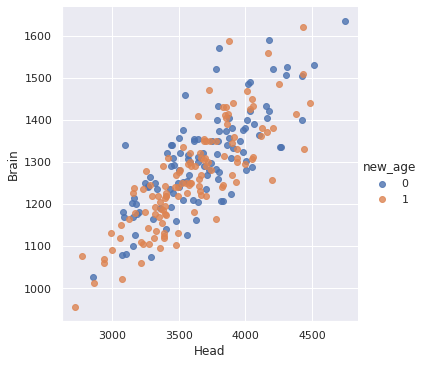

In [21]:
### YOUR CODE HERE ###
import seaborn as sns
sns.set_theme()

ax = sns.lmplot(x='Head', y='Brain', data=df, hue='new_age', fit_reg=False)

12) Estimate the brain weight of a 60-year-old with a head size of 4000 cubic cm.

In [27]:
### YOUR CODE HERE ###
intercept = model_age.params[0]
slope1 = model_age.params[1]
x1 = 4000
slope2 = model_age.params[2]
x2 = 1

estimate1 = 347.6 + (0.26*4000) - (20.7*1)
estimate2 = intercept + (slope1*x1) + (slope2*x2)
print(estimate1)
print(estimate2)

1366.8999999999999
1368.573921722076


1368.57g

13) Estimate the brain weight of a 20-year-old with a head size of 3900 cubic cm.

In [29]:
### YOUR CODE HERE ###
intercept = model_age.params[0]
slope1 = model_age.params[1]
x1 = 3900
slope2 = model_age.params[2]
x2 = 0

estimate = intercept + (slope1*x1) + (slope2*x2)
print(estimate)

1363.261689710586


1363.26g

#Portfolio Project Assignment

Get (and give) constructive feedback to a peer.  Swap projects with at least one other student, and give each other constructive feedback.  Make sure to tell them what you like about their project as well as any suggestions you have for imporvement.



---

